# Machine Learning - Exam project

In [73]:
#Import the required dependencies
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras

# Data visualisation inmports
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#Define the data sources
training_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

#Assigning the column
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum','maritalStatus','occupation','relationship','race','sex','capitalGain','capitalLoss','hoursPerWeek','nativeCountry','salary']

#Define the DataFrames
training_df = pd.read_csv(training_url, names=column_names)
test_df = pd.read_csv(test_url, names=column_names)

In [75]:
# saving a copy to preserve descriptive values
training_df_pre_transformation = training_df

# Displaying our training dataset formatted in our way
training_df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [76]:
# Displaying our test dataset formatted in our way
test_df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,salary
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


## Preparation of data
In this section we will be preparing the data to be used for training and evaluation. This includes removing the null values from the dataset.

### Training dataset

In [77]:
# Saving number of data rows to the variable for future comparison. 
pre_preparation_training_rows = training_df.shape[0]

print(f"Number of rows pre data preparation {pre_preparation_training_rows}")

Number of rows pre data preparation 32561


In [78]:
# Getting the num of null values in every column:
training_df.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
educationNum     0
maritalStatus    0
occupation       0
relationship     0
race             0
sex              0
capitalGain      0
capitalLoss      0
hoursPerWeek     0
nativeCountry    0
salary           0
dtype: int64

In [79]:
# Removing the rows containing null values from the training dataset
training_df = training_df.dropna(how='any')

# Saving number of data rows to the variable for future comparison. 
post_preparation_training_rows = training_df.shape[0]

print(f"Number of rows post removing rows with null values {post_preparation_training_rows} number of rows removed {post_preparation_training_rows - pre_preparation_training_rows}")

Number of rows post removing rows with null values 32561 number of rows removed 0


Running training_df.dropna on the training dataset didn't remove any rows because it had no NaN values what we could also see from running training_df.isnull().sum() 

In [80]:
# Removing the rows with data points equal to '?'
training_df = training_df[~training_df[column_names].isin([' ?']).any(axis=1)]

# Saving number of data rows to the variable for future comparison. 
post_preparation_training_rows = training_df.shape[0]

print(f"Number of rows post removing rows with data points equal to '?' {post_preparation_training_rows} number of rows removed {pre_preparation_training_rows - post_preparation_training_rows}")

Number of rows post removing rows with data points equal to '?' 30162 number of rows removed 2399


In [81]:
# Comparing number of result data preparation had on our dataset.
diff_rows = (pre_preparation_training_rows - post_preparation_training_rows) / pre_preparation_training_rows * 100

print(f"The percent difference between the number of rows pre and post our data preparation {diff_rows:.2f}%")

The percent difference between the number of rows pre and post our data preparation 7.37%


### Testing dataset

In [82]:
# Saving number of data rows to the variable for future comparison. 
pre_preparation_test_rows = test_df.shape[0]

print(f"Number of rows pre data preparation {pre_preparation_test_rows}")

Number of rows pre data preparation 16282


In [83]:
# Getting the num of null values in every column:
test_df.isnull().sum()

age              0
workclass        1
fnlwgt           1
education        1
educationNum     1
maritalStatus    1
occupation       1
relationship     1
race             1
sex              1
capitalGain      1
capitalLoss      1
hoursPerWeek     1
nativeCountry    1
salary           1
dtype: int64

In [84]:
# Removing the rows containing null values from the training dataset
test_df = test_df.dropna(how='any')

# Saving number of data rows to the variable for future comparison. 
post_preparation_test_rows = test_df.shape[0]

print(f"Number of rows post removing rows with null values {post_preparation_test_rows} number of rows removed {post_preparation_test_rows - pre_preparation_test_rows}")

Number of rows post removing rows with null values 16281 number of rows removed -1


Unlike the training data test data has some NaN data so some of the rows are removed from the dataset.

In [85]:
# Removing the rows with data points equal to '?'
test_df = test_df[~test_df[column_names].isin([' ?']).any(axis=1)]

# Saving number of data rows to the variable for future comparison. 
post_preparation_test_rows = test_df.shape[0]

print(f"Number of rows post removing rows with data points equal to '?' {post_preparation_test_rows} number of rows removed {pre_preparation_test_rows - post_preparation_test_rows}")

Number of rows post removing rows with data points equal to '?' 15060 number of rows removed 1222


In [86]:
# Comparing number of result data preparation had on our dataset.
diff_rows = (pre_preparation_test_rows - post_preparation_test_rows) / pre_preparation_test_rows * 100

print(f"The percent difference between the number of rows pre and post data preparation {diff_rows:.2f}%")

The percent difference between the number of rows pre and post data preparation 7.51%


## Data preprocessing


In [88]:
#Import the required dependencies
from sklearn.preprocessing import LabelEncoder

In [89]:
# Initialize the labelEncoder variable
label_encoder = LabelEncoder()

In [90]:
# Deterfining which columns to be transformed
colums_to_transform = ['workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'nativeCountry', 'salary']

### Training dataset

In [91]:
# Transforming the values of in the specificed columns of the DataFrame into integer labels.
for column in colums_to_transform: training_df[column] = label_encoder.fit_transform(training_df[column])
training_df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,salary
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


# Data visualization

Applying data visualization technics to the dataset to determine which columns can be dropped in order to avoid overfitting the data by the model. 

<Figure size 2000x1000 with 0 Axes>

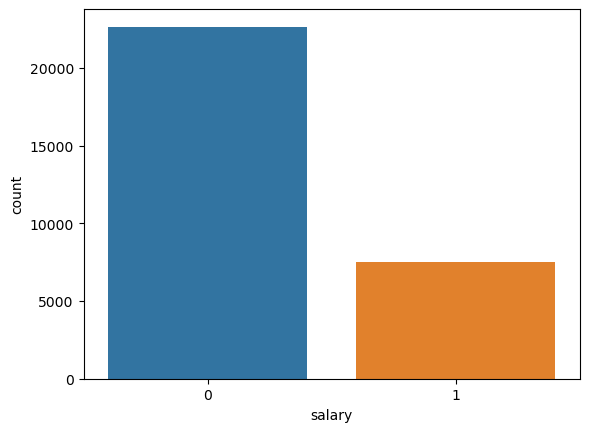

<Figure size 2000x1000 with 0 Axes>

In [92]:
sns.countplot(x="salary", data=training_df)
plt.figure(figsize=(20,10))

Running the distribution of thwe salary we can see that the data is scewed, hence we need to address it when it comes to the data preparation part, otherwise we can endup with a model that overfits the data.

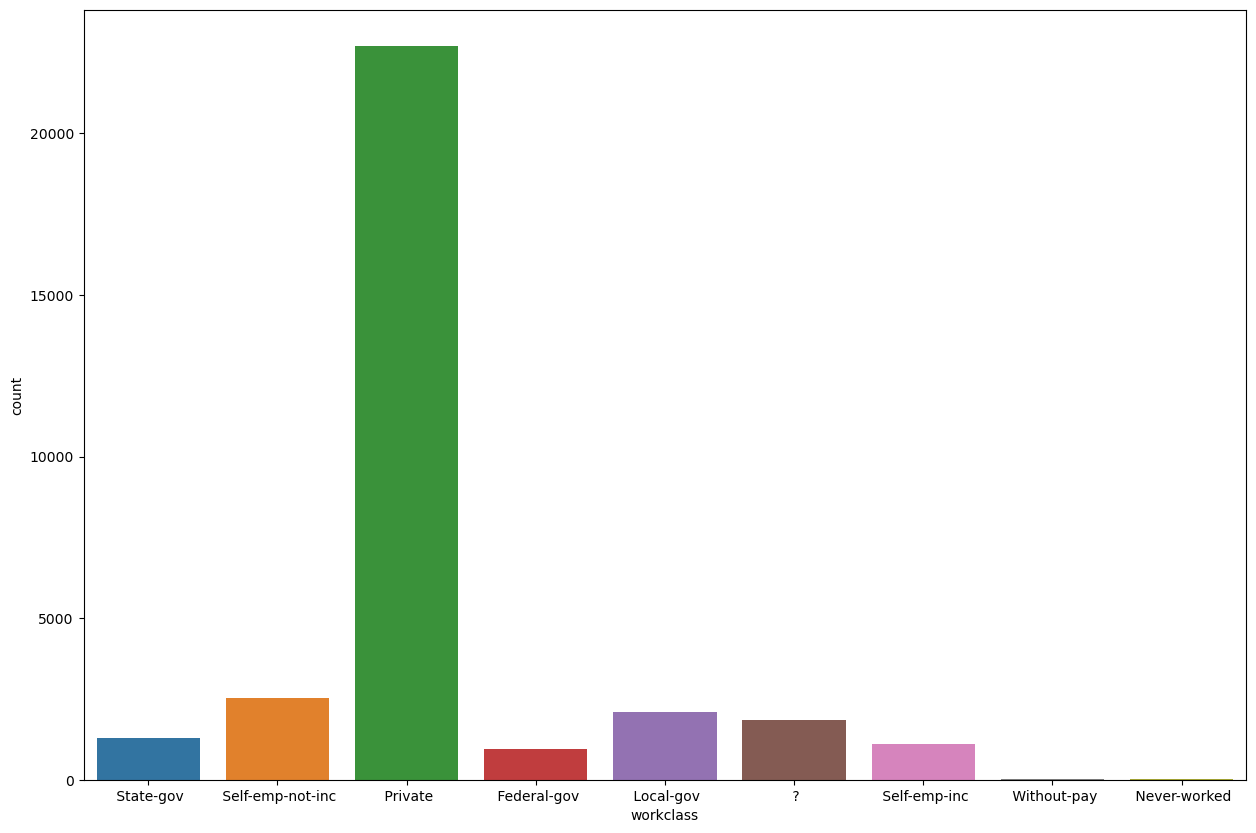

In [101]:
plt.figure(figsize = (15,10))
sns.countplot(x = training_df_pre_transformation['workclass'])
plt.show()

Upon analyzing the survey data, it becomes apparent that a significant majority of the individuals in the dataset belong to the "Private" workclass category. This raises concerns about the representativeness of the data, as we have limited information on other types of workclasses. This skew in the data could potentially result in biased or incomplete conclusions if we make generalizations or assumptions based solely on this dataset without considering external factors or collecting more diverse data.

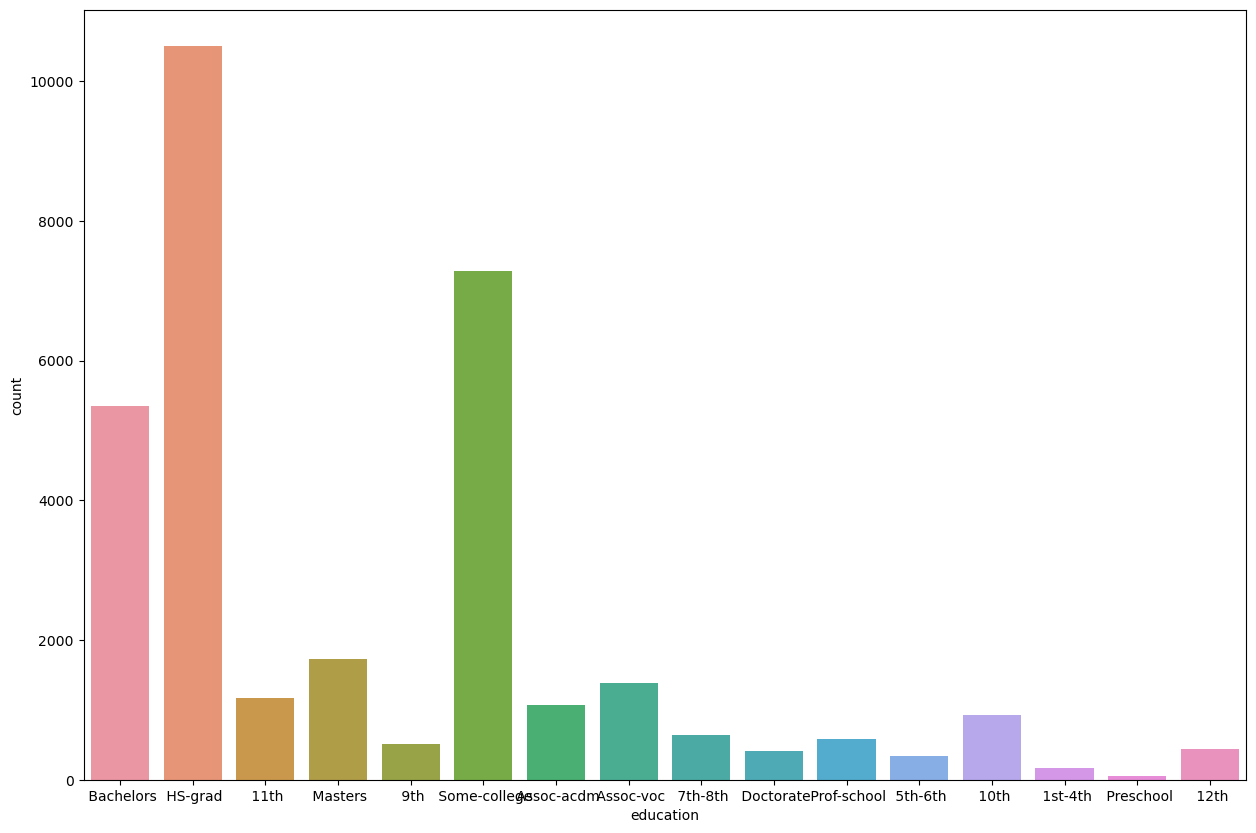

In [100]:
categorical_columns = list(training_df_pre_transformation.select_dtypes(include=['object']).columns)

plt.figure(figsize = (15,10))
sns.countplot(x = training_df_pre_transformation[categorical_columns[1]])
plt.show()

The graph is noteworthy because it reveals that the majority of respondents in the survey have educational backgrounds that fall into one of three categories: HS-grad, Bachelor's degree, or some college. This observation highlights the importance of considering the representativeness of the sample when making generalizations or drawing conclusions based on the survey data, as the educational backgrounds of the respondents may not be fully representative of the broader population.

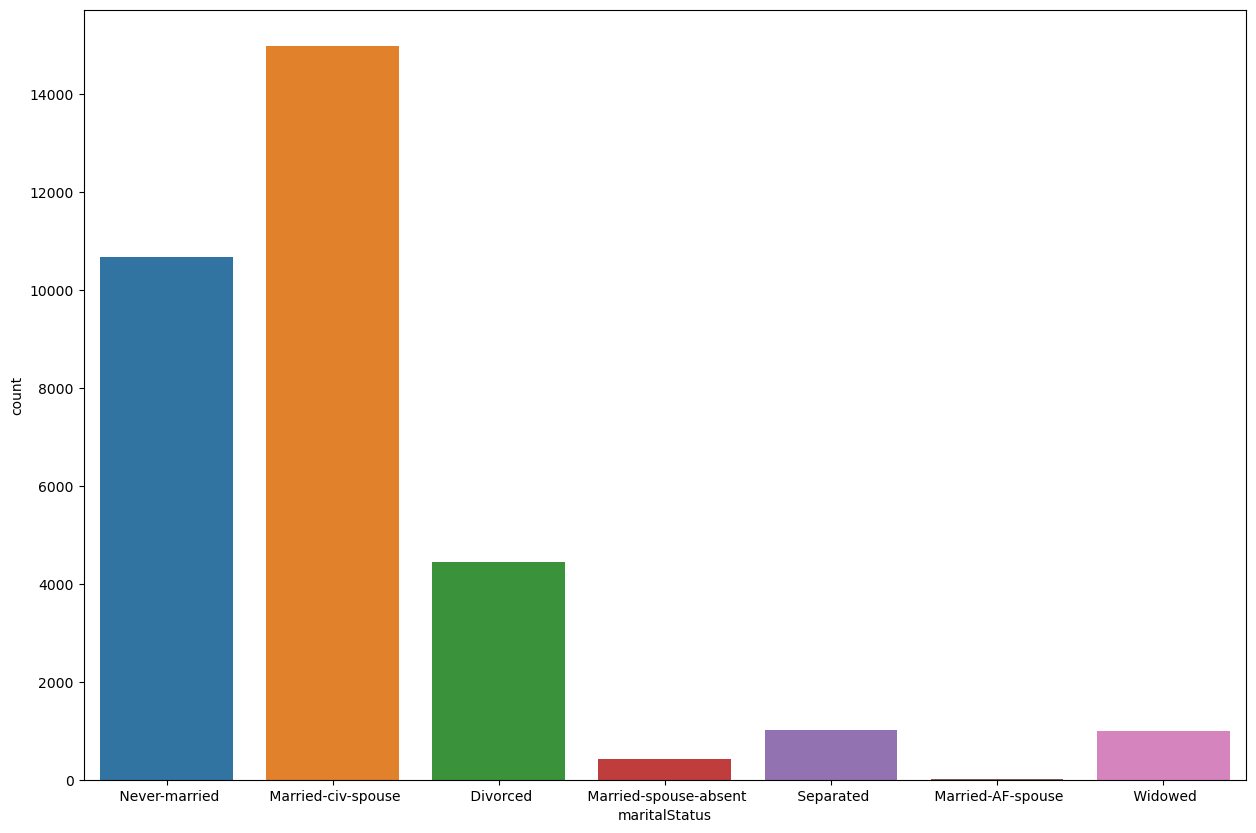

In [99]:
plt.figure(figsize = (15,10))
sns.countplot(x = training_df_pre_transformation[categorical_columns[2]])
plt.show()

In [102]:
training_df_pre_transformation['maritalStatus'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: maritalStatus, dtype: int64

According to the analysis of the relative frequencies of civil status in my dataset and those reported by the US Census Bureau, it seems that the distribution of civil status in my dataset is generally similar to that of the US population. The source of this information is the US Census Bureau, and the data is from 2020. Although this statment is drown for civil status only, excluding the age data which should be considered.

In [103]:
training_df_pre_transformation['nativeCountry'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

From the distribution of the native country we can see that this data is only representative of the native population of us which is also complete

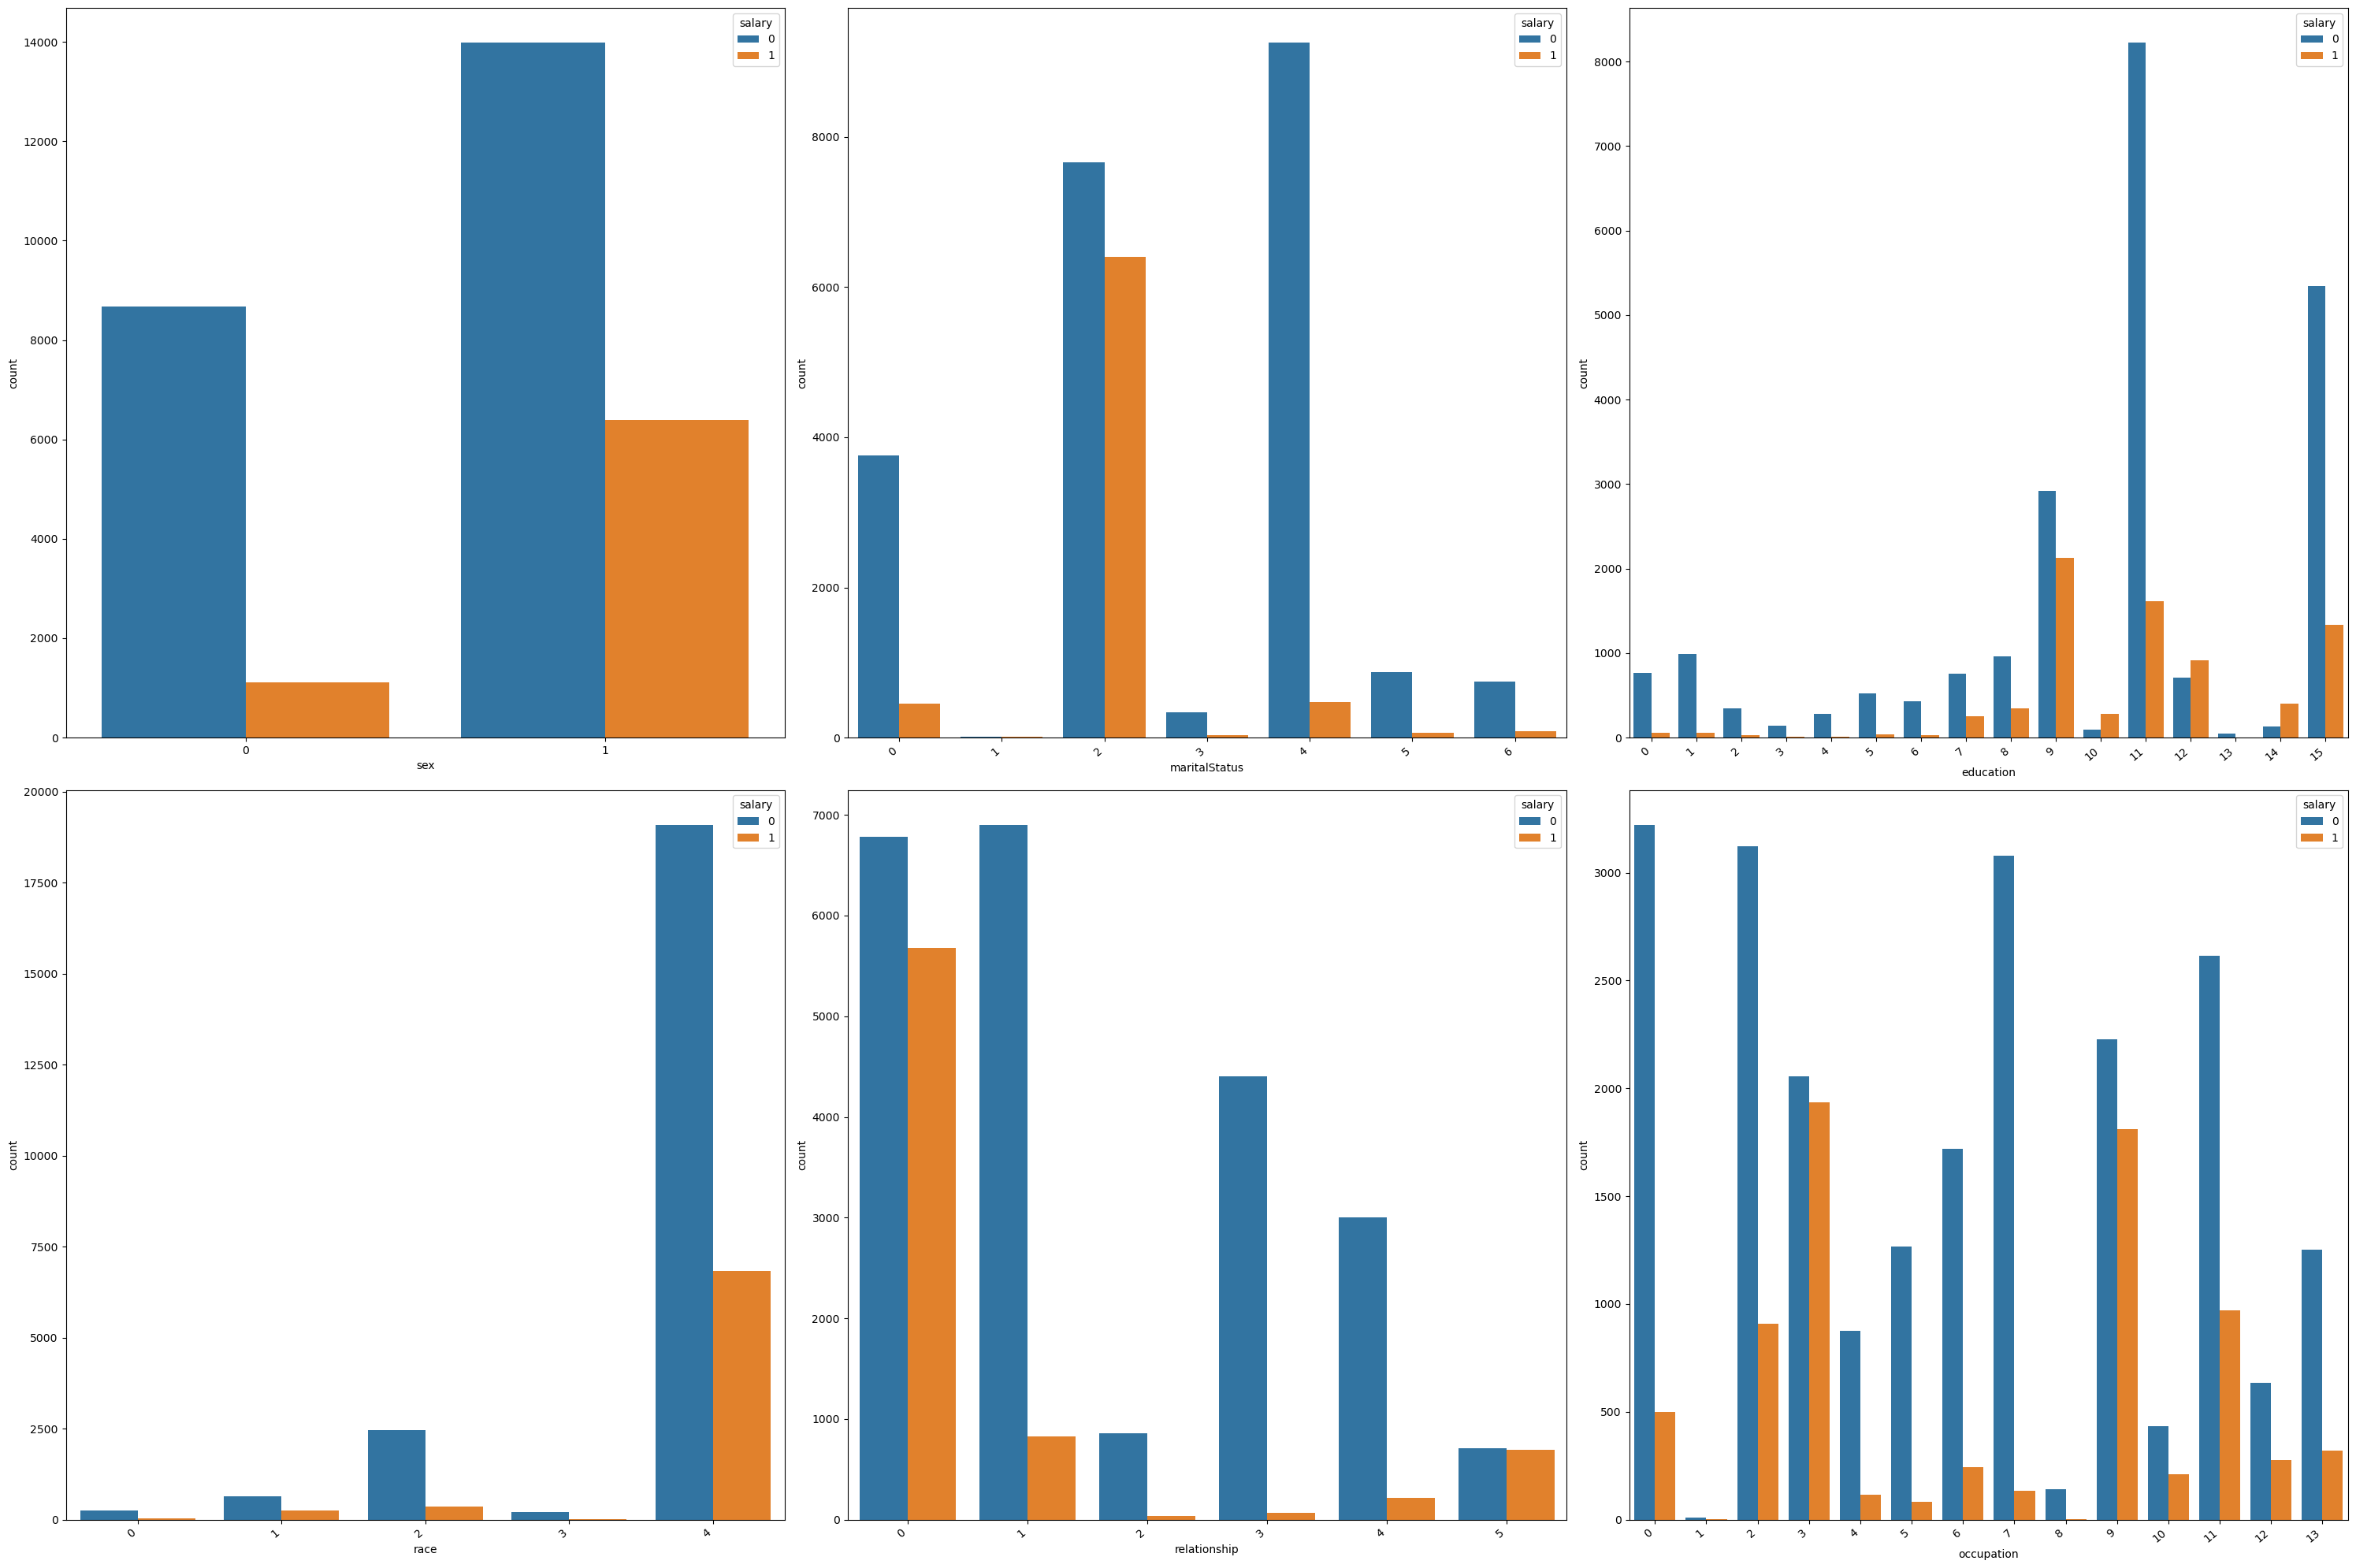

In [50]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(30,20))
sns.countplot(x="sex", data=training_df,hue="salary",ax = ax[0][0])
cp = sns.countplot(x="maritalStatus", data=training_df,hue="salary",ax = ax[0][1])
cp.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")
cp2 = sns.countplot(x="education", data=training_df,hue="salary",ax = ax[0][2])
cp2.set_xticklabels(cp2.get_xticklabels(), rotation=40, ha="right")
cp3 = sns.countplot(x="race", data=training_df,hue="salary",ax = ax[1][0])
cp3.set_xticklabels(cp3.get_xticklabels(), rotation=40, ha="right")
cp4 = sns.countplot(x="relationship", data=training_df,hue="salary", ax = ax[1][1])
cp4.set_xticklabels(cp4.get_xticklabels(), rotation=40, ha="right")
cp5 = sns.countplot(x="occupation", data=training_df,hue="salary",ax= ax[1][2])
cp5.set_xticklabels(cp5.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

### Testing dataset

In [19]:
# Transforming the values of in the specificed columns of the DataFrame into integer labels.
for column in colums_to_transform: test_df[column] = label_encoder.fit_transform(test_df[column])
test_df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,salary
1,25,2,226802.0,1,7.0,4,6,3,2,1,0.0,0.0,40.0,37,0
2,38,2,89814.0,11,9.0,2,4,0,4,1,0.0,0.0,50.0,37,0
3,28,1,336951.0,7,12.0,2,10,0,4,1,0.0,0.0,40.0,37,1
4,44,2,160323.0,15,10.0,2,6,0,2,1,7688.0,0.0,40.0,37,1
6,34,2,198693.0,0,6.0,4,7,1,4,1,0.0,0.0,30.0,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,33,2,245211.0,9,13.0,4,9,3,4,1,0.0,0.0,40.0,37,0
16277,39,2,215419.0,9,13.0,0,9,1,4,0,0.0,0.0,36.0,37,0
16279,38,2,374983.0,9,13.0,2,9,0,4,1,0.0,0.0,50.0,37,0
16280,44,2,83891.0,9,13.0,0,0,3,1,1,5455.0,0.0,40.0,37,0


In [20]:
#From the above correlation matrix remove the unneccesary column which have least significant correlation with the target varaible "Income
post_data_analysis_df = training_df.drop(['fnlwgt','education', 'capitalLoss','nativeCountry'],axis=1)
post_data_analysis_df

,age,workclass,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,hoursPerWeek,salary
0,39,5,13,4,0,1,4,1,2174,40,0
1,50,4,13,2,3,0,4,1,0,13,0
2,38,2,9,0,5,1,4,1,0,40,0
3,53,2,7,2,5,0,2,1,0,40,0
4,28,2,13,2,9,5,2,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,12,2,12,5,4,0,0,38,0
32557,40,2,9,2,6,0,4,1,0,40,1
32558,58,2,9,6,0,4,4,0,0,40,0
32559,22,2,9,4,0,3,4,1,0,20,0


## Preparing for networking

In [39]:
#Import the required dependencies
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [36]:
# Define X and Y
X = post_data_analysis_df.drop(['salary'],axis = 1)
y = post_data_analysis_df['salary']

In [331]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Split the train set into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=40)



# Print the shapes of the resulting sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (16890, 10) (16890,)
Validation set shape: (4223, 10) (4223,)
Test set shape: (9049, 10) (9049,)


## Network Try#1 

In [42]:
# Make a new variable to use on this model from the dataset
nw1_X_train = X_train
nw1_X_test = X_test
nw1_X_valid = X_valid

nw1_y_train = y_train
nw1_y_test = y_test
nw1_y_valid = y_valid

# Print the shapes of the resulting sets
print("Train set shape:", nw1_X_train.shape, nw1_y_train.shape)
print("Validation set shape:", nw1_X_valid.shape, nw1_y_valid.shape)
print("Test set shape:", nw1_X_test.shape, nw1_y_test.shape)

Train set shape: (16890, 10) (16890, 1)
Validation set shape: (4223, 10) (4223,)
Test set shape: (9049, 10) (9049, 1)


### Creating the neutral network   

This code defines a neural network model using the Keras API in TensorFlow. In our case model is created as a Sequential() object, which means that the layers are added one after another in a sequence.

The ReLU activation function is used in the hidden layers to introduce nonlinearity into the model, and the sigmoid activation function is used in the output layer to produce a probability value that can be used for binary classification tasks.

Layer is followed by a dropout layer, this is a regularization technique used in deep neural networks to reduce overfitting by preventing complex co-adaptations on training data.

In [159]:
# Neural network
nw1_model = Sequential()
nw1_model.add(Dense(10, input_dim=10, activation='relu'))
nw1_model.add(Dropout(0.1))
nw1_model.add(Dense(10, activation='relu'))
nw1_model.add(Dropout(0.1))
nw1_model.add(Dense(10, activation='relu'))
nw1_model.add(Dropout(0.1))
nw1_model.add(Dense(10, activation='relu'))
nw1_model.add(Dropout(0.1))
nw1_model.add(Dense(1, activation='sigmoid'))

In [160]:
nw1_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nw1_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 10)                110       
                                                                 
 dropout_24 (Dropout)        (None, 10)                0         
                                                                 
 dense_55 (Dense)            (None, 10)                110       
                                                                 
 dropout_25 (Dropout)        (None, 10)                0         
                                                                 
 dense_56 (Dense)            (None, 10)                110       
                                                                 
 dropout_26 (Dropout)        (None, 10)                0         
                                                                 
 dense_57 (Dense)            (None, 10)              

### Training the model

In [161]:
history = nw1_model.fit(X_train, y_train, epochs=10, batch_size=500)

Epoch 1/10
34/34 [==============================] - 0s 490us/step - loss: 229.8343 - accuracy: 0.6770
Epoch 2/10
34/34 [==============================] - 0s 520us/step - loss: 93.6418 - accuracy: 0.5663
Epoch 3/10
34/34 [==============================] - 0s 480us/step - loss: 39.0328 - accuracy: 0.5593
Epoch 4/10
34/34 [==============================] - 0s 456us/step - loss: 17.7345 - accuracy: 0.6350
Epoch 5/10
34/34 [==============================] - 0s 453us/step - loss: 13.8910 - accuracy: 0.7023
Epoch 6/10
34/34 [==============================] - 0s 452us/step - loss: 12.3636 - accuracy: 0.7098
Epoch 7/10
34/34 [==============================] - 0s 454us/step - loss: 8.5543 - accuracy: 0.7212
Epoch 8/10
34/34 [==============================] - 0s 448us/step - loss: 6.6400 - accuracy: 0.7276
Epoch 9/10
34/34 [==============================] - 0s 452us/step - loss: 7.6531 - accuracy: 0.7290
Epoch 10/10
34/34 [==============================] - 0s 456us/step - loss: 4.9250 - accuracy:

### Evaluation of initial run

In [162]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

By applying this threshold, the output predictions are converted into a binary format that is easier to interpret and use for further analysis, such as classification metrics like precision and recall.

Here we have values to give a brief overview of how successfull is our trained model when tested with generated.

Precission reflects pecentage of true positive as a fraction of all positive results.

Recall, also known as sensitivity or true positive rate, measures the proportion of true positives out of all actual positives (positive cases in the ground truth). A high recall indicates that the model is correctly identifying positive cases and has a low rate of false negatives (predicted negative cases that are actually positive)

The F1 score is the harmonic mean of precision and recall and ranges from 0 (worst) to 1 (best).

In [163]:
# Applying threshold
y_pred = nw1_model.predict(X_test)
y_pred = (y_pred > 0.30)

#Precission
nw1_initial_precision = precision_score(y_test, y_pred)

#Recall
nw1_initial_recall_score = recall_score(y_test, y_pred)

#F1-score
nw1_initial_f1_score = f1_score(y_test, y_pred)

print("Network 1")
print("Initial PrecisionScore:", nw1_initial_precision)
print("Initial RecallScore:", nw1_initial_recall_score)
print("Initial F1Score:", nw1_initial_f1_score)

283/283 [==============================] - 0s 208us/step
Network 1
Initial PrecisionScore: 0.3045977011494253
Initial RecallScore: 0.8008888888888889
Initial F1Score: 0.4413421503796228


In [176]:
# Save the model.
nw1_model.save("network1_adult_data")

INFO:tensorflow:Assets written to: network1_adult_data/assets


### Fine tuning

### Evaluation of fine tuning

## Network Try#2

### Creating the neutral network   

In [133]:
nw2_model = keras.models.Sequential()
# Neural network
nw2_model.add(Dense(10, input_dim=10, activation='relu'))
nw2_model.add(Dropout(0.1))
nw2_model.add(Dense(10, activation='relu'))
nw2_model.add(Dropout(0.1))
nw2_model.add(Dense(10, activation='relu'))
nw2_model.add(Dropout(0.1))
nw2_model.add(Dense(10, activation='relu'))
nw2_model.add(Dropout(0.1))
nw2_model.add(Dense(1, activation='sigmoid'))

In [144]:
nw2_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nw2_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 10)                110       
                                                                 
 dropout_20 (Dropout)        (None, 10)                0         
                                                                 
 dense_50 (Dense)            (None, 10)                110       
                                                                 
 dropout_21 (Dropout)        (None, 10)                0         
                                                                 
 dense_51 (Dense)            (None, 10)                110       
                                                                 
 dropout_22 (Dropout)        (None, 10)                0         
                                                                 
 dense_52 (Dense)            (None, 10)              

### Creating and setting the log directory

In [166]:
# Define the root log directory.
root_logdir = os.path.join(os.curdir, "network2_logs")

In [167]:
# Create a function that will generate a subdirectory path based on the current date and time
# (this information must be passed to the TensorBoard callback as an argument)
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./network2_logs/run_2023_03_20-19_02_50'

### Setting callsbacks

In [168]:
# Define callbacks.

# ModelCheckpoint.
checkpoint_cb = keras.callbacks.ModelCheckpoint("network2_adult_data", save_best_only=True)

# EarlyStopping (with rollback to the best model).
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

#TensorBoard.
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

### Training the model

In [169]:
# Train the model with callbacks
history = nw2_model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/40
528/528 [==============================] - 0s 886us/step - loss: 0.4097 - accuracy: 0.8066 - val_loss: 0.3752 - val_accuracy: 0.8361
Epoch 2/40
528/528 [==============================] - 0s 860us/step - loss: 0.4027 - accuracy: 0.8080 - val_loss: 0.3743 - val_accuracy: 0.8293
Epoch 3/40
528/528 [==============================] - 0s 851us/step - loss: 0.4040 - accuracy: 0.8071 - val_loss: 0.3736 - val_accuracy: 0.8326
Epoch 4/40
528/528 [==============================] - 0s 355us/step - loss: 0.4165 - accuracy: 0.8099 - val_loss: 0.3782 - val_accuracy: 0.8335
Epoch 5/40
528/528 [==============================] - 0s 355us/step - loss: 0.4026 - accuracy: 0.8121 - val_loss: 0.3813 - val_accuracy: 0.8188
Epoch 6/40
528/528 [==============================] - 0s 355us/step - loss: 0.4053 - accuracy: 0.8102 - val_loss: 0.3745 - val_accuracy: 0.8366
Epoch 7/40
528/528 [==============================] - 0s 357us/step - loss: 0.4007 - accuracy: 0.8136 - val_loss: 0.3759 - val_accuracy:

### Evaluation of the initial run

In [170]:
nw2_model.evaluate(X_test, y_test)

283/283 [==============================] - 0s 216us/step - loss: 0.3807 - accuracy: 0.8269


[0.380746066570282, 0.8269422054290771]

In [171]:
# Applying threshold
y_pred = nw2_model.predict(X_test)
y_pred = (y_pred > 0.30)

283/283 [==============================] - 0s 190us/step


In [172]:
#Precission
nw2_initial_precision = precision_score(y_test, y_pred)

#Recall
nw2_initial_recall_score = recall_score(y_test, y_pred)

#F1-score
nw2_initial_f1_score = f1_score(y_test, y_pred)

print("Network 2")
print("Initial PrecisionScore:", nw2_initial_precision)
print("Initial RecallScore:", nw2_initial_recall_score)
print("Initial F1Score:", nw2_initial_f1_score)

Network 2
Initial PrecisionScore: 0.5800524934383202
Initial RecallScore: 0.8008888888888889
Initial F1Score: 0.6292454748830588


In [174]:
# Load the TensorBoard extension in the Jupyter notebook
%load_ext tensorboard

# Start the TensorBoard server, and view inside the notebook.
%tensorboard --logdir=./network2_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

E0320 19:03:03.871382 8154768640 program.py:298] TensorBoard could not bind to port 6006, it was already in use
ERROR: TensorBoard could not bind to port 6006, it was already in use

### Saving the model

In [175]:
# Save the model.
nw2_model.save("network2_adult_data")

INFO:tensorflow:Assets written to: network2_adult_data/assets


### Fine tuning

### Evaluation of the fine tuning

## Network Try#3

### Creating neural network

In [227]:
# Create a function that builds, compiles and returns a Keras model.
# Note that the function takes a HyperParameters object (hp) as a parameter, which it can
# use to define hyperparameters along with their range of possible values.
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    nw3_model = tf.keras.Sequential()
    nw3_model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        nw3_model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    nw3_model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
    
    nw3_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return nw3_model

### Training the model

Now comes the part where neural network is going through the process of learning.

RandomSearch() method provided by Keras_tuner library in conjunction with search() execute multiple runs limited by the max_trials number.

In [228]:
# Use KerasTuner RandomSearch to tune hyperparameters
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=2, overwrite=True,
    directory="my_mnist", project_name="my_rnd_search", seed=42)

random_search_tuner.search(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Trial 2 Complete [00h 00m 02s]
val_accuracy: 0.7648590803146362

Best val_accuracy So Far: 0.7811982035636902
Total elapsed time: 00h 00m 03s
INFO:tensorflow:Oracle triggered exit


### Evaluation of the initial run

In [232]:
# Display a summary of the best model:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 5
n_neurons: 25
learning_rate: 0.0006562536901904111
Score: 0.7811982035636902


In [233]:
# Display the best model's accuracy measured on the validation set:
best_trial.metrics.get_last_value("val_accuracy")

0.7811982035636902

In [234]:
# Evaluate the model's accuracy on the test set:
best_model = random_search_tuner.get_best_models(num_models=1)[0]
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

283/283 [==============================] - 0s 247us/step - loss: 0.5066 - accuracy: 0.7729


In [235]:
best_model.evaluate(X_test, y_test)

283/283 [==============================] - 0s 230us/step - loss: 0.5066 - accuracy: 0.7729


[0.5065889358520508, 0.7729030847549438]

In [236]:
# Applying threshold
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.30)

283/283 [==============================] - 0s 201us/step


In [237]:
#Precission
nw3_initial_precision = precision_score(y_test, y_pred)

#Recall
nw3_initial_recall_score = recall_score(y_test, y_pred)

#F1-score
nw3_initial_f1_score = f1_score(y_test, y_pred)

print("Network 3")
print("Initial PrecisionScore:", nw3_initial_precision)
print("Initial RecallScore:", nw3_initial_recall_score)
print("Initial F1Score:", nw3_initial_f1_score)

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

## Network Try#4

In [297]:
# Define callbacks.

# ModelCheckpoint.
checkpoint_cb = keras.callbacks.ModelCheckpoint("network2_adult_data", save_best_only=True)

# EarlyStopping (with rollback to the best model).
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

#TensorBoard.
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [310]:
# Create a function that builds, compiles and returns a Keras model.
# Note that the function takes a HyperParameters object (hp) as a parameter, which it can
# use to define hyperparameters along with their range of possible values.
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=4, max_value=8, default=4)
    n_neurons = hp.Int("n_neurons", min_value=31, max_value=31)
    learning_rate = hp.Float("learning_rate", min_value=200, max_value=300,
                             sampling="log")
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    nw3_model = tf.keras.Sequential()
    nw3_model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        nw3_model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    nw3_model.add(tf.keras.layers.Dense(20, activation="sigmoid"))
    
    
    nw3_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    
    
    return nw3_model

In [311]:
# Use KerasTuner RandomSearch to tune hyperparameters
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=10, overwrite=True,
    directory="my_mnist", project_name="my_rnd_search", seed=42)

random_search_tuner.search(X_train, y_train, epochs=40,
                           validation_data=(X_valid, y_valid),
                           callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Trial 10 Complete [00h 00m 08s]
val_accuracy: 0.8400331735610962

Best val_accuracy So Far: 0.8404476046562195
Total elapsed time: 00h 01m 12s
INFO:tensorflow:Oracle triggered exit


In [303]:
# Display a summary of the best model:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 7
n_neurons: 31
learning_rate: 3.118133260427308e-06
Score: 0.8404476046562195


In [289]:
# Display a summary of the best model:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 6
n_neurons: 31
learning_rate: 0.07902373711581126
Score: 0.8412764072418213


In [44]:
# Define the root log directory
root_logdir = os.path.join(os.curdir, "network1_logs")

In [45]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./network1_logs/run_2023_03_20-18_21_17'

## Display learning curves in TensorBoard

In [ ]:
# Load the TensorBoard extension in the Jupyter notebook
%load_ext tensorboard

# Start the TensorBoard server, and view inside the notebook.
%tensorboard --logdir=./my_logs --port=6006

# Creating the neutral network   

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

Next step is compilation of a neural network. It takes 3 arguments which can be used for fine tuning based on give dataset.

In [ ]:
# Compiling the neutral network model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Now comes the part where neural network is going through the process of learning. 

fit() method provided by Keras library

It takes a nuber of parametrs explained below
   X_train: The feature data (independent variables) used for training the model.
   Y_train: The target data (dependent variable) used for training the model.
   epochs: The number of times the entire training dataset is passed through the model during training. Here, it is       set to 10, meaning that the model will be trained for 10 iterations over the entire dataset.
   batch_size: The number of samples used in each batch during training. Here, it is set to 1, meaning that the model     will update its weights after each sample is processed.

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=1)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

By applying this threshold, the output predictions are converted into a binary format that is easier to interpret and use for further analysis, such as classification metrics like precision and recall.

In [ ]:
# Applying threshold
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.30)

Here we have values to give a brief overview of how successfull is our trained model when tested with generated.

Precission reflects pecentage of true positive as a fraction of all positive results.

Recall, also known as sensitivity or true positive rate, measures the proportion of true positives out of all actual positives (positive cases in the ground truth). A high recall indicates that the model is correctly identifying positive cases and has a low rate of false negatives (predicted negative cases that are actually positive)

The F1 score is the harmonic mean of precision and recall and ranges from 0 (worst) to 1 (best).

In [ ]:
#Precission
precision_score(Y_test, y_pred)

In [ ]:
#Recall
recall_score(Y_test, y_pred)

In [ ]:
#F1-score
f1_score(Y_test, y_pred)

In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [313]:
lr = LogisticRegression(solver = "liblinear")
gn = GaussianNB()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()

In [324]:
#LogisticRegression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#GaussianNB/ Naive Byers
gn.fit(X_train,y_train)
y_pred_gn = gn.predict(X_test)

#RandomForestClassifier
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

#DecisionTreeClassifier
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

#SVC
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

#XGB
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/t8/b1_99hjn46d11y74f5mvq38h0000gn/T/ipykernel_7555/3698403520.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when

In [325]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [327]:
print("Logistic Regression:")
print("Accuracy score:", round(accuracy_score(y_test, y_pred_lr) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_lr) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_lr) * 100,3))


print("GaussianNB/ Naive Byers:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_gn) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_gn) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_gn) * 100,3))

print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_rf) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_rf) * 100,3))

print("DecisionTreeClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_dt) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_dt) * 100,3))

print("Support Vector Machine:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_svc) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_svc) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_svc) * 100,3))

print("XGBoost Classifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_xgb) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_xgb) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_xgb) * 100,3))

Logistic Regression:
Accuracy score: 82.517
F1 Score:  55.462
MSE:  17.483
GaussianNB/ Naive Byers:
Accuracy score: 79.943
F1 Score:  38.495
MSE:  20.057
RandomForestClassifier:
Accuracy score: 84.164
F1 Score:  64.834
MSE:  15.836
DecisionTreeClassifier:
Accuracy score: 80.583
F1 Score:  59.206
MSE:  19.417
Support Vector Machine:
Accuracy score: 79.644
F1 Score:  27.651
MSE:  20.356
XGBoost Classifier:
Accuracy score: 86.717
F1 Score:  70.336
MSE:  13.283


In [335]:
from sklearn.neural_network import MLPClassifier

# Create an instance of MLPClassifier with the desired hyperparameters
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=1000)

# Fit the MLP model to the training data
mlp.fit(X_train, y_train)

# Predict the class labels for the test data using the trained MLP model
y_pred_mlp = mlp.predict(X_test)

print("XGBoost Classifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_mlp) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_mlp) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_mlp) * 100,3))

XGBoost Classifier:
Accuracy score: 81.191
F1 Score:  60.028
MSE:  18.809


In [345]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Define X and y variables and split the data into train, validation, and test sets
X = training_df.drop('salary', axis=1)
y = training_df['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=40)

# Multilayer Perceptron (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Gradient Boosted Decision Trees (GBDT)
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gbdt.fit(X_train, y_train)
y_pred_gbdt = gbdt.predict(X_test)
accuracy_gbdt = accuracy_score(y_test, y_pred_gbdt)

# Print the accuracy scores for each classifier
print("Accuracy scores:")
print("Multilayer Perceptron:", accuracy_mlp)
print("Random Forest:", accuracy_rf)
print("Gradient Boosted Decision Trees:", accuracy_gbdt)


Accuracy scores:
Multilayer Perceptron: 0.7878218587689247
Random Forest: 0.8585479058459499
Gradient Boosted Decision Trees: 0.8683832467675986
